<a href="https://colab.research.google.com/github/esmaeilifardi/LGBMRegressor---Car-Dataset/blob/main/LGBMRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('car.csv')

df = pd.DataFrame(data)

In [ ]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df['Transmission'].nunique()

2

In [ ]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

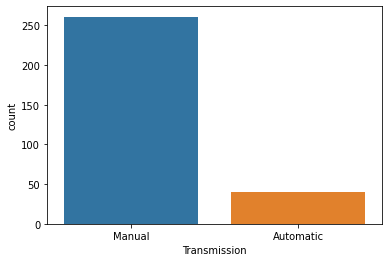

In [ ]:
sns.countplot(data=df, x='Transmission')

In [ ]:
df.describe().transpose().reset_index()

,index,count,mean,std,min,25%,50%,75%,max
0,Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
1,Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
2,Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
3,Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
4,Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [ ]:
des = df.describe().transpose().reset_index().sort_values('mean')

In [ ]:
'''
plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=des, x='index', y='mean')
plt.xticks(rotation=90) #rotate x labels
'''

"\nplt.figure(figsize=(10,5), dpi=100)\nsns.barplot(data=des, x='index', y='mean')\nplt.xticks(rotation=90) #rotate x labels\n"

In [ ]:
df['current_year']=2022

In [ ]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022


In [ ]:
df['age'] = df['current_year']-df['Year']

In [ ]:
df.drop('current_year', axis=1, inplace=True)

In [ ]:
df.drop('Year', axis=1, inplace=True)

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [ ]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,age,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,-0.070132,-0.048484,-0.050987,-0.044502,-0.046209,...,-0.003107,-0.042241,0.062962,0.052209,-0.049143,0.006038,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,-0.067274,-0.047624,-0.048895,-0.045684,-0.045684,...,-0.019375,0.007242,0.045339,0.014729,-0.042744,-0.005796,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.449361,-0.053013,-0.002896,-0.044536,-0.025203,...,-0.008000,0.050668,0.032997,-0.051867,0.011053,-0.024550,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.014272,-0.010075,-0.010075,-0.010075,-0.010075,...,-0.022680,-0.024886,-0.038541,-0.010075,-0.020251,0.117621,-0.053469,0.055687,0.124269,-0.050316
age,-0.236141,0.047584,0.524342,0.182104,1.000000,0.046121,-0.067442,-0.027442,-0.047442,-0.047442,...,-0.007748,0.212166,0.004321,-0.087442,0.095596,-0.059276,-0.064315,0.059959,0.039896,-0.000394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Car_Name_xcent,0.006038,-0.005796,-0.024550,0.117621,-0.059276,-0.008206,-0.005793,-0.005793,-0.005793,-0.005793,...,-0.013040,-0.014309,-0.022160,-0.005793,-0.011644,1.000000,-0.050063,0.051103,-0.073976,0.039279
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,-0.040808,-0.028808,-0.028808,-0.028808,-0.028808,...,0.065282,-0.011662,0.126733,0.115710,-0.057905,-0.050063,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,0.041656,0.029406,0.029406,0.029406,0.029406,...,-0.062353,-0.044910,-0.121563,-0.113355,-0.012632,0.051103,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,0.110929,0.078308,0.078308,0.078308,0.078308,...,-0.041403,-0.105148,-0.162839,-0.042567,-0.085563,-0.073976,-0.350467,0.358321,1.000000,0.063240


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.70)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
df.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,age,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,4.75,9.54,43000,0,9,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [ ]:
model.feature_importances_

array([4.69176889e-01, 4.06298790e-02, 7.56059490e-04, 1.07091119e-01,
       1.83000640e-07, 6.07311637e-07, 4.07414265e-06, 0.00000000e+00,
       8.60599347e-07, 1.87427618e-05, 8.20426901e-07, 2.46503237e-08,
       1.24200338e-07, 6.14500197e-07, 0.00000000e+00, 1.66128817e-06,
       0.00000000e+00, 6.75481141e-06, 2.74587800e-06, 2.93716962e-06,
       0.00000000e+00, 1.81078435e-06, 1.59117789e-06, 5.59369681e-06,
       2.97094200e-07, 0.00000000e+00, 5.54566141e-07, 2.38876204e-07,
       2.29319464e-07, 1.85163600e-06, 1.48525007e-06, 3.63732494e-07,
       1.47425370e-07, 1.13798060e-06, 0.00000000e+00, 7.97444512e-06,
       9.42078922e-07, 0.00000000e+00, 1.53694607e-06, 1.15533541e-07,
       1.20335253e-05, 2.09995856e-07, 4.64122014e-06, 0.00000000e+00,
       9.35666503e-06, 3.63939340e-05, 0.00000000e+00, 8.00649829e-06,
       1.73885755e-05, 1.13072703e-04, 2.11511694e-05, 2.64852399e-05,
       3.18134308e-05, 0.00000000e+00, 3.60738276e-06, 2.82719936e-06,
      

In [ ]:
seri_fea_imp = pd.Series(model.feature_importances_)

In [ ]:
seri_fea_imp.head(2)

0    0.469177
1    0.040630
dtype: float64

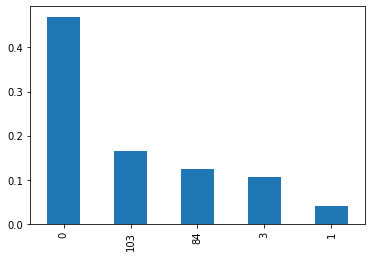

In [ ]:
seri_fea_imp.nlargest(5).plot(kind='bar')
plt.show()

In [ ]:
#sns.barplot(data=seri_fea_imp.nlargest(5) , x= seri_fea_imp.index);

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
from scipy.stats import uniform, randint

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model = LGBMRegressor()

In [ ]:
param_rand = {'n_estimators':[int(x) for x in np.linspace(1, 100, 10)],
                       'gamma':uniform(0,0.5),
                       'learning_rate':uniform(0.03,0.3),
                       'max_depth':randint(2,6),
                       'n_stimators':randint(100,150),
                       'subsample':uniform(0.6, 0.4)
                       }

In [ ]:
rand_model = RandomizedSearchCV(estimator= model,
                                param_distributions= param_rand,
                                scoring='neg_mean_squared_error',
                                n_iter=10,
                                cv=5, 
                                verbose=2,
                                random_state=0,
                                n_jobs=1)

In [ ]:
rand_model.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.2744067519636624, learning_rate=0.24455680991172585, max_depth=5, n_estimators=34, n_stimators=139, subsample=0.7694619197355619; total time=   0.0s
[CV] END gamma=0.2744067519636624, learning_rate=0.24455680991172585, max_depth=5, n_estimators=34, n_stimators=139, subsample=0.7694619197355619; total time=   0.0s
[CV] END gamma=0.2744067519636624, learning_rate=0.24455680991172585, max_depth=5, n_estimators=34, n_stimators=139, subsample=0.7694619197355619; total time=   0.0s
[CV] END gamma=0.2744067519636624, learning_rate=0.24455680991172585, max_depth=5, n_estimators=34, n_stimators=139, subsample=0.7694619197355619; total time=   0.0s
[CV] END gamma=0.2744067519636624, learning_rate=0.24455680991172585, max_depth=5, n_estimators=34, n_stimators=139, subsample=0.7694619197355619; total time=   0.0s
[CV] END gamma=0.32294705653332806, learning_rate=0.16127616337880774, max_depth=4, n_estimators=89, n_stimat

In [ ]:
y_pred = rand_model.predict(X_test)

In [ ]:
rand_model.best_params_

{'gamma': 0.05913721293446661,
 'learning_rate': 0.22197630639825713,
 'max_depth': 3,
 'n_estimators': 100,
 'n_stimators': 132,
 'subsample': 0.8087393287000286}

In [ ]:
rand_model.best_estimator_

LGBMRegressor(gamma=0.05913721293446661, learning_rate=0.22197630639825713,
              max_depth=3, n_stimators=132, subsample=0.8087393287000286)

In [ ]:
#rand_model.feature_importances_

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
error_rates = []

for i in range(1, 92):
  model = LGBMRegressor(n_estimators=i)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  error = mean_absolute_error(y_pred, y_test)
  error_rates.append(error)  # 2 to 1

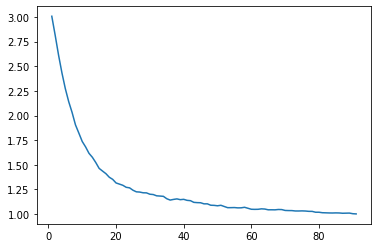

In [ ]:
plt.plot(range(1, 92), error_rates)  # error not decress after ~10   elbow method

In [ ]:
print('msa:', mean_absolute_error(y_pred, y_test))

msa: 1.000785956884675
